# Baseball Data: a thorough analysis 
#### A data set containing complete batting and pitching statistics from 1871 to 2014, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. 

#### the data is available at: http://www.seanlahman.com/baseball-archive/statistics/

### Focus of our analysis
#### Our analysis will focus on players salaries:
- What is the salary evolution between 1871 and 2014?
- Were different teams awarded different salaries?
    - were the difference justified?
- Did awarded players earn more on average?
- What was the influence of appearances on salary?
- Did the college attended influence salary of players?
- Were the players with the best statistics awarded the with the best salaries?

### Packages needed

In [1]:
# Import General Packages
import numpy as np
import pandas as pd

# Import plotting/graphics packages
import matplotlib.pyplot as plt
import seaborn as sns 

# Graphics inline 
%matplotlib inline

### Importing the datasets of interest 

Main tables:
- MASTER - Player names, DOB, and biographical info
- Batting - batting statistics
- Pitching - pitching statistics
- Fielding - fielding statistics


Supplemented by theses tables 
- Teams - yearly stats and standings 
- Salaries - player salary data
- AwardsPlayers - awards won by players
- AwardsSharePlayers - award voting for player awards
- Appearances - details on the positions a player appeared at
- Schools - list of colleges that players attended
- CollegePlaying - list of players and the colleges they attended

In [2]:
master = pd.read_csv('baseballdatabank-2017.1/core/Master.csv')
batting = pd.read_csv('baseballdatabank-2017.1/core/Batting.csv')
pitching = pd.read_csv('baseballdatabank-2017.1/core/Pitching.csv')
fielding = pd.read_csv('baseballdatabank-2017.1/core/Fielding.csv')
teams = pd.read_csv('baseballdatabank-2017.1/core/Teams.csv')
salaries = pd.read_csv('baseballdatabank-2017.1/core/Salaries.csv')
awardPlayers = pd.read_csv('baseballdatabank-2017.1/core/AwardsPlayers.csv')
awardsSharePlayers = pd.read_csv('baseballdatabank-2017.1/core/AwardsSharePlayers.csv')
appearances = pd.read_csv('baseballdatabank-2017.1/core/Appearances.csv')
schools = pd.read_csv('baseballdatabank-2017.1/core/Schools.csv')
collegePlaying = pd.read_csv('baseballdatabank-2017.1/core/CollegePlaying.csv')

# Salary

In [33]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [11]:
salaries.lgID.unique()

array(['NL', 'AL'], dtype=object)

In [24]:
mean_salary_pa = salaries.groupby(['yearID']).mean()['salary']
median_salary_pa = salaries.groupby(['yearID']).median()['salary']
max_salary_pa = salaries.groupby(['yearID']).max()['salary']

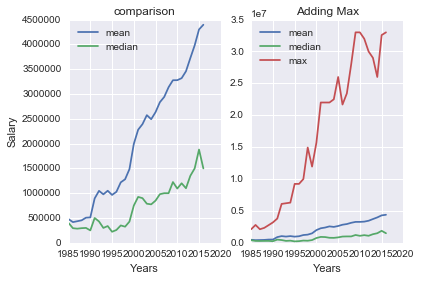

In [30]:
plt.subplot(1, 2, 1)
plt.plot(mean_salary_pa, label='mean')
plt.plot(median_salary_pa, label='median')
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('comparison')

plt.subplot(1, 2, 2)
plt.plot(mean_salary_pa, label='mean')
plt.plot(median_salary_pa, label='median')
plt.plot(max_salary_pa, label='max')
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.title('Adding Max')

#### First let's note that the data for the salaries is spanning from 1985 to 2016, unlike other datasets
- the spread between mean an median increases at a fast rate 
- so we want to understand more the difference between average/median and maximum values and as we can see the spread is huge. There are huge inequalities between players, what are the reasons:
    - skills?
    - college?
    - team?
    - but the first step would be to see where this maximum values come from

### Understanding the maximum values 

In [41]:
max_salary_pa.head() #So we have a list 

yearID
1985    2130300
1986    2800000
1987    2127333
1988    2340000
1989    2766667
Name: salary, dtype: int64

In [43]:
salaries.groupby('yearID').head(2).reset_index(drop=True)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1986,ATL,NL,ackerji01,367500
3,1986,ATL,NL,assenpa01,60000
4,1987,ATL,NL,ackerji01,350000
5,1987,ATL,NL,alexado01,650000
6,1988,ATL,NL,ackerji01,435000
7,1988,ATL,NL,assenpa01,81000
8,1989,ATL,NL,ackerji01,688000
9,1989,ATL,NL,alvarjo01,125000
